# سلام و احترام
## من برای انجام این پروژه از تکنیک های مختلف کلاس بندی استفاده میکنم و با ارزیابی بهترین تکنیک را شناسایی میکنم

## KNN

In [1]:
pip install scikit-learn==0.23.1

  ERROR: Command errored out with exit status 1:


  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'



   command: 'C:\Users\Mohammad\anaconda3\python.exe' 'C:\Users\Mohammad\AppData\Local\Temp\pip-standalone-pip-fvvf5gj6\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\Mohammad\AppData\Local\Temp\pip-build-env-jf3cp30_\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline


    ERROR: Failed building wheel for numpy
    Running setup.py clean for numpy
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Mohammad\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mohammad\\AppData\\Local\\Temp\\pip-install-pxoxjwf8\\numpy_5c4d335c53894b4ba158cba4602d2203\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mohammad\\AppData\\Local\\Temp\\pip-install-pxoxjwf8\\numpy_5c4d335c53894b4ba158cba4602d2203\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' clean --all
         cwd: C:\Users\Mohammad\AppData\Local\Temp\pip-install-pxoxjwf8\numpy_5c4d335c53894b4ba158cba4602d2203
    Complete output (10 lines):
    Running from numpy source directory.
  
    `setup.py clean` is not suppor

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.shape

(303, 14)

### ابتدا نگاهی به دیتا می اندازیم

In [18]:
#مثلا اول ببینیم توی داده ها از هر کتگوری چند تا داریم

df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

array([[<AxesSubplot:title={'center':'chol'}>]], dtype=object)

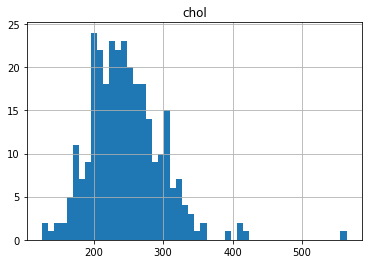

In [20]:
#یا بیایم هیستوگرام بکشیم بر اساس قسمتهای مختلف داده

df.hist(column= 'chol', bins=50) #بین رو 40 گذاشتیم روی محور افقی هرکدوم از خطای کوچیک 50 هستند


In [21]:
#یه نگاه به ستونهایمان می اندازیم

df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


# یک نکته مهم اینه که ما فایل داده ها را با پانداز خوندیم. اما سایکیت لرن با نامپای کار میکنه.

### پانداز داده ها رو به صورت خوشگل و جدولی میخونه که بالاتر دیدیم
### اما نامپای میاد ارایه هایی از ارایه ها درست میکنه تا سایکیت لرن بتونه باهاشون کار کنه

In [22]:
# میایم فایل داده ها رو میبریم به فضای نامپای 
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall',]] .values 
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [23]:
# همچنین طبقه بندی نهایی رو هم به عنوان ایگرگ جدا میکنیم
y=df[['output']].values
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [24]:
# حالا میایم داده ها رو روی منحنی نرمال استاندارد نرمالیزه می کنیم


In [26]:
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X.astype(float))
print(X[0:2])

[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
   0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
  -0.51292188]]


## Splitting our data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242, 1)
Test set: (61, 13) (61, 1)


## Classification

In [28]:
from sklearn.neighbors import KNeighborsClassifier

## lets go for training

In [29]:
# lets put k=5
k = 5

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

## Predicting:

In [30]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [31]:
# میتونیم توی چند تا داده اول مقایسه کنیم بین مقادیر واقعی و پیش بینی شده
print(y[0:5])
print(yhat[0:5])

[[1]
 [1]
 [1]
 [1]
 [1]]
[0 0 1 1 0]


## Accuracy evaluation

In [32]:
# اینجا از شاخص جاکار برای تعیین صحت الگوریتم استفاده میکنیم

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.871900826446281
Test set Accuracy:  0.8032786885245902


# یه نکته مهم اینه که باید صحت الگوریتم رو به ازای مقادر مختلف کی حساب کنیم
* پس میایم مقادیر صحت این الگوریتم رو بر اساس مقادیر مختلف کی میسنجیم

In [33]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

array([0.7704918 , 0.7704918 , 0.80327869, 0.80327869, 0.80327869,
       0.81967213, 0.83606557, 0.81967213, 0.81967213])

## Plot the model accuracy for a different number of neighbors

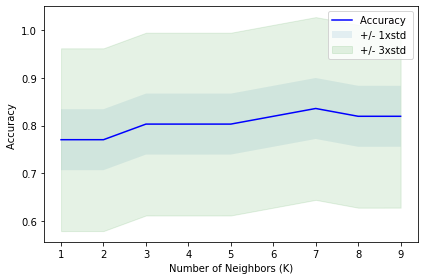

In [34]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# .........Final evaluation of KNN algorithm.........

In [35]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8360655737704918 with k= 7
